# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

## Importeren, Data, Beginwaardes en Constanten

In [58]:
#Import blah blah
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [81]:
#Data en constanten
m_m = 0.8208        #Massa maatbeker (kg)
m_t_s = 1.2929      #Massa maatbeker + water (start) (kg)
m_t_e = 1.2749      #Massa maatbeker + water (eind) (kg)

m_s = m_t_s - m_m       #Massa water (start) (kg)
m_e = m_t_e - m_m       #Massa water (eind) (kg)

c = 4186        #Soortelijk warmte van water (J/(kg*L)
L_v = 2260e3  #Latent heat van water bij verdamping (J/kg)

Data = np.loadtxt("tempmetingen.csv", skiprows = 1, delimiter = ';')        #Importeren van data T(t)

tData = Data[:,0]
TData = Data[:,1] 

#ijklmnop

## Opdracht 1

/var/folders/gr/rpsz1hsj6jd2l86vpvw5hg2w0000gn/T/ipykernel_33637/1542532465.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

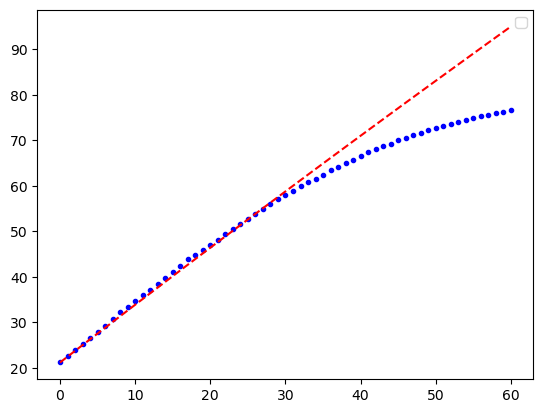

In [77]:
#Als Q_loss = 0
T_verschil = TData[-1] - tData[0]     #Temp. verschil (˚C)
t_verschil = tData[-1] - tData[0]     #Tijd verschil (s)

dm = (m_e - m_s) / len(tData)       #Massa verschil (kg)
m = []
for i in range(len(tData)):
    m.append(m_s-dm*i)


P_constant = m_s * c * (T_verschil/t_verschil)     #Vermogen (W)


T_0 = TData[0]          #Begin temp. (˚C)
T_theoretisch = []      #Theoretisch temperatuur als functie van de tijd (˚C/s)
for j in range(len(tData)):
    T_theoretisch.append(T_0 + ((P_constant * tData[j]) / (m[j] * c))) 


plt.figure()
plt.legend()
plt.plot(tData,TData,'b.', label='Gemeten T')
plt.plot(tData,T_theoretisch, 'r--', label='Theoretisch T')
plt.show

## Opdracht 2

### Aanames
1. Massa (m) neemt lineair af van begin_massa naar eind_massa
2. Warmte verlies aan specifiek de maatbeker wordt niet meegerekend

In [90]:
P = 0.0   #Vermogen tijdens meting (W)
for l in range(len(tData)-1):
    dt_vermogen = tData[l+1] - tData[l]
    dT_vermogen = TData[l+1] - TData[l] 
    P += m[l] * c * (dT_vermogen/dt_vermogen)



Q_in = P * t_verschil     #Toegevoegde energie het systeem in (J)

Q_verwarm = 0.0      #Energie verwarming van water (J)
for k in range(len(tData)-1):
    dt_verwarm = tData[k+1] - tData[k]
    dT_verwarm = TData[k+1] - TData[k]
    Q_verwarm += m[k] * c * (dT_verwarm/dt_verwarm)
    
m_verdamp = m_s - m_e       #Massa bij het verdamping (kg)
Q_verdamp = m_verdamp * L_v #Energie bij het verdamping (J)

Q_gerekend = Q_verwarm + Q_verdamp
Q_loss = Q_in - Q_gerekend

Q_verhouding = Q_loss / Q_in * 100 #%

print('Q_in = ' + str(Q_in))
print('Q_verwarm = ' + str(Q_verwarm))
print('Q_verdamp = ' + str(Q_verdamp))
print('Q_gerekend = ' + str(Q_gerekend))
print('Q_loss = ' + str(Q_loss))
print('Verhouding Q = ' + str(Q_verhouding))

Q_in = 6663721.700104917
Q_verwarm = 111062.02833508195
Q_verdamp = 40680.00000000004
Q_gerekend = 151742.028335082
Q_loss = 6511979.671769835
Verhouding Q = 97.72286366141772


## Opdracht 3

1. Geef informatie over maatbeker zodat de warmteverlies aan de maatbeker meegerekend kan worden, zonder aannames te maken over de maatbeker.
2. Geef informatie over de verwarm element gebruikt om het water te verwarmen: het vermogen over de tijd. Hiermee hoeft niet aangenomen/uitgerekend te worden wat het vermogen is.
3. Doe de metingen over kleine tijdstappen en geef ze ook aan in seconden zodat nauwkeuriger metingen krijg en beter het verband kunnen zien.
4. Geef de massa over de tijd zodat we niet een aaname hoeven te maken dat de massa lineair afneemt.

